In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
# NaN값을 바로 앞의 행 데이터값으로 채운다.
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True) # 행 인덱스로 지정
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

In [6]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

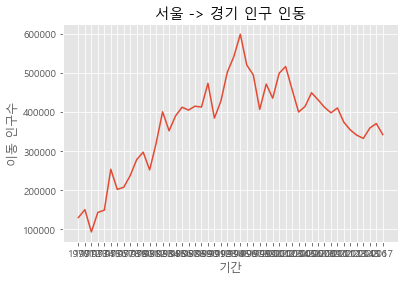

In [10]:
# plot
plt.plot(sr_one.index, sr_one.values)

# 판다스 객체를 plot함수에 입력
#plt.plot(sr_one)

plt.title('서울 -> 경기 인구 인동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

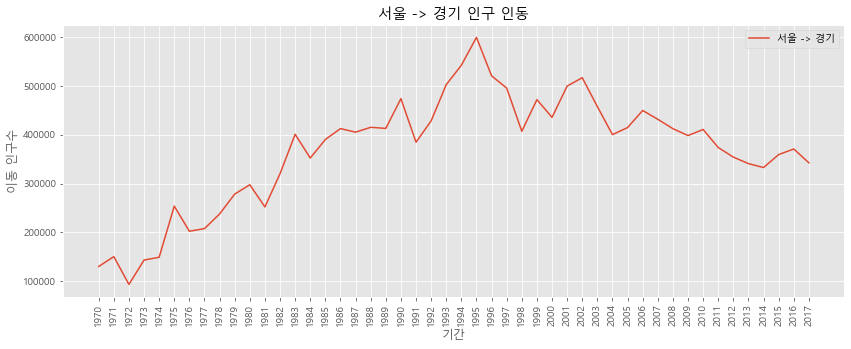

In [12]:
plt.figure(figsize = (14,5))

plt.xticks(rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 인동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(labels = ['서울 -> 경기'], loc = 'best') # 범례
plt.show()

In [8]:
# 1-2. 그래프 꾸미기
# 스타일 서식의 종류
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


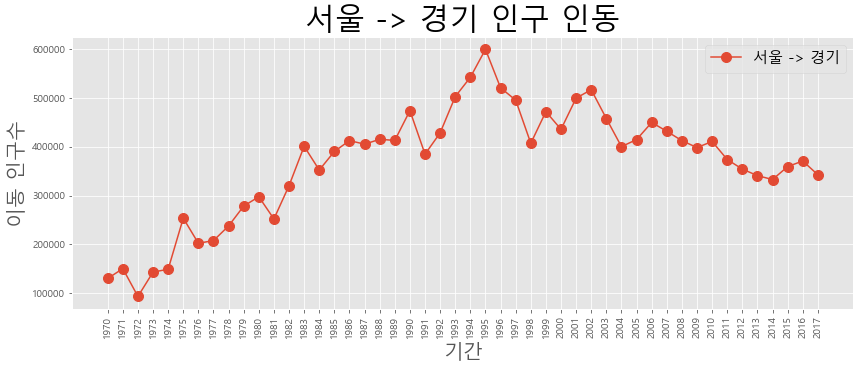

In [13]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5)) # 그림 사이즈 지정
plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 회전
plt.plot(sr_one.index, sr_one.values, marker='o',markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 인동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)
plt.show()

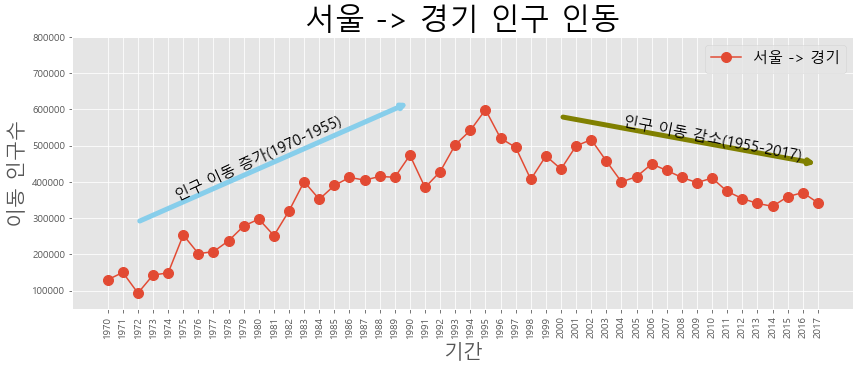

In [14]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14,5)) # 그림 사이즈 지정
plt.xticks(size = 10, rotation = 'vertical') # x축 눈금 라벨 회전
plt.plot(sr_one, marker='o',markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 인동',size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)

# 주석 표시 - 화살표
plt.ylim(50000,800000) # y축 범위 지정
plt.annotate('',
             xy = (20,620000),   # 화살표 끝점
             xytext = (2,290000),# 화살표 시작점
             xycoords = 'data',  # 좌표체
             arrowprops=dict(arrowstyle='->', color='skyblue',lw=5)
             )

plt.annotate('',
             xy = (47,450000),   
             xytext = (30,580000),
             xycoords = 'data',  
             arrowprops=dict(arrowstyle='->', color='olive',lw=5)
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1955)',
             xy = (10,350000),   
             rotation = 25,
             va = 'baseline',
             ha = 'center',
             fontsize=15
             )

plt.annotate('인구 이동 감소(1955-2017)',
             xy = (40,460000),   
             rotation = -11,
             va = 'baseline',
             ha = 'center',
             fontsize=15
             )

plt.show()

<ipython-input-21-661f9cb36fa9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-21-661f9cb36fa9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


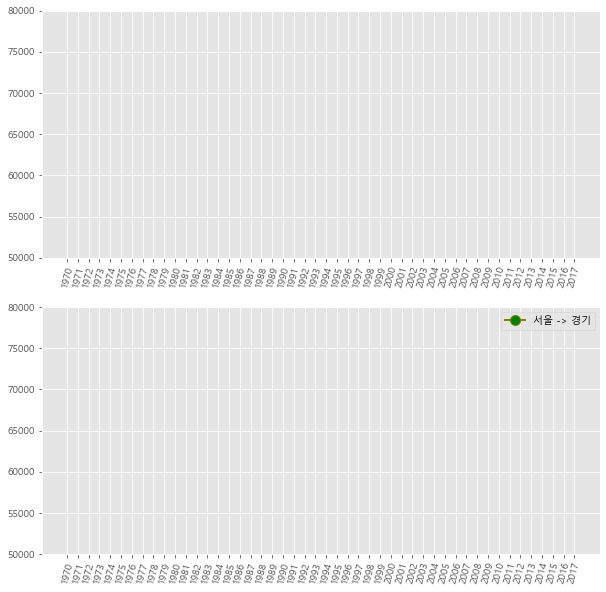

In [21]:
# 화면 분할하여 그래프 여러 개 그리기
# aex 객체

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker = 'o', markerfacecolor='green',markersize=10,
         color='olive',linewidth=2,label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,80000)
ax2.set_ylim(50000,80000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

<ipython-input-19-78a56cf4e2cb>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


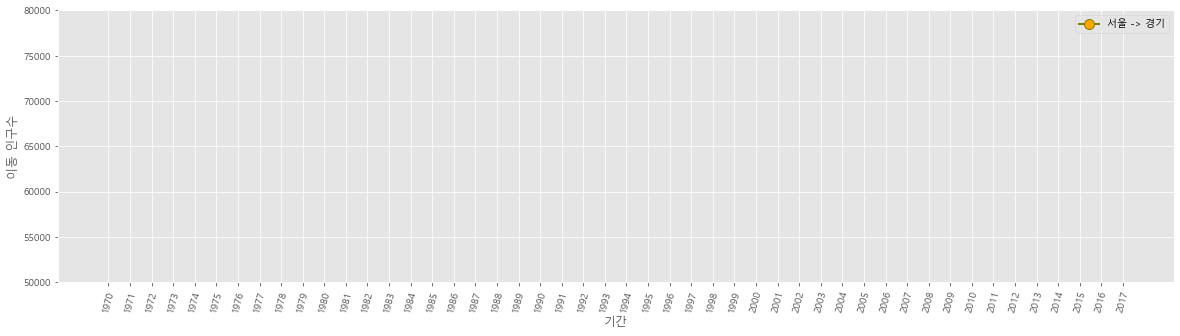

In [19]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
sr_one = df_seoul.loc['경기도']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker = 'o', markerfacecolor='orange',markersize=10,
         color='olive',linewidth=2,label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000,80000)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
plt.show()

<ipython-input-18-cd20a459cf0e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years,rotation=90)


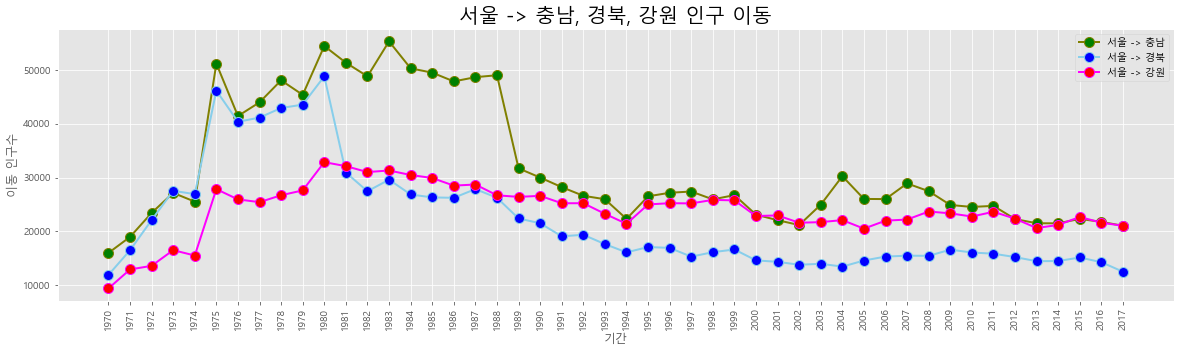

In [18]:
# 같은 화면에 그래프 추가
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

plt.style.use('ggplot')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:],marker='o', markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:],marker='o', markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:],marker='o', markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(col_years,rotation=90)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

<ipython-input-22-3964886dbbdb>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years,rotation=90)
<ipython-input-22-3964886dbbdb>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years,rotation=90)
<ipython-input-22-3964886dbbdb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years,rotation=90)
<ipython-input-22-3964886dbbdb>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years,rotation=90)


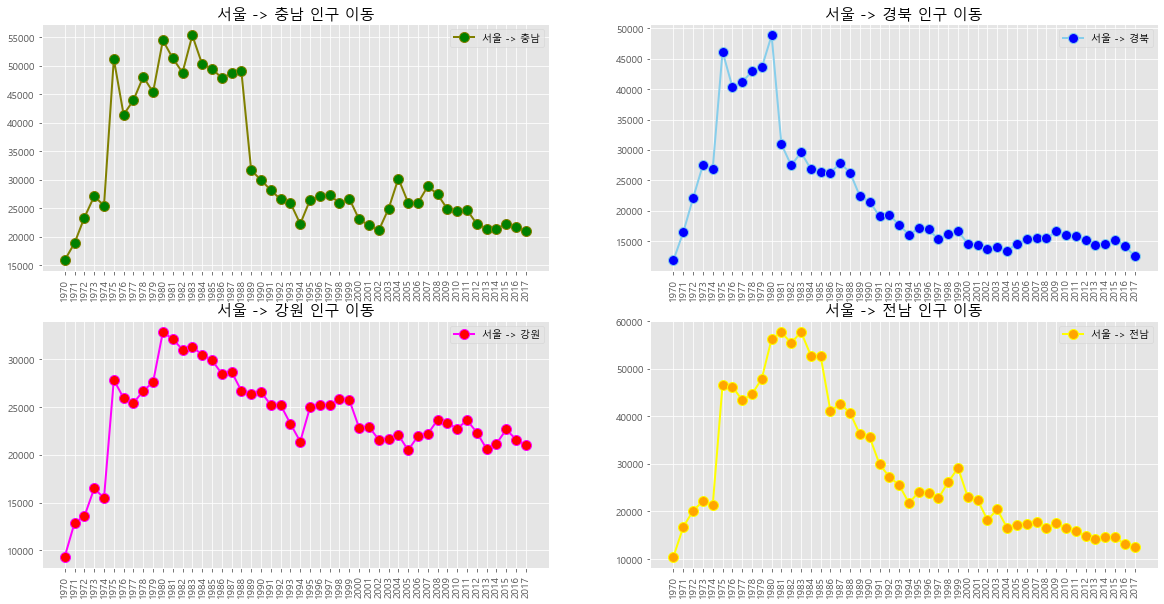

In [22]:
# 화면 4분할 그래프
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_4.loc['충청남도',:],marker='o', markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:],marker='o', markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:],marker='o', markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:],marker='o', markerfacecolor='orange',
        markersize=10,color='yellow',linewidth=2,label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)

plt.show()

In [23]:
# matplotlib 스타일 리스트 출력
import matplotlib
colors={}
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'